# Cellular Automaton 2D
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [cellularAutomaton2D.ipynb](https://github.com/diegoinacio/creative-coding-notebooks/blob/master/Simulation/cellularAutomaton2D.ipynb)
---
Implementation of an uni-dimensional cellular automata of binary values.

<font color='#CC0000'>[<b>PT-BR</b> content]</font>

Implementação de um autômato celular bidimensional em valores binários.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as manim
import numpy as np
import imageio

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)
plt.set_cmap('gray')

<Figure size 1152x576 with 0 Axes>

## 1. Definição da lista de regra
---
A função ***conjRegras*** resulta em uma lista de regras para definição de novos estados para as células centrais em gerações posteriores, com base em uma vizinhança definida por uma area ou kernel. Se uma célula tem *raio* igual a **1**, seu diâmetro será **3** e sua *area* igual a **9**. Para uma vizinhança de area **9** existem $2^9=512$ padrões possíveis e $2^{512}$ (valor com mais de 150 dígitos) possibilidades de regras.


- Autômato celular com regra **35**

| x                                     | 511     | ...     | 11      | ...     | 5       | ...     | 1       | 0       |
|---------------------------------------|---------|---------|---------|---------|---------|---------|---------|---------|
| **estado atual**                      |111111111| ...     |000001011| ...     |000000101| ...     |000000001|000000000|
| **novo estado para células centrais** | 0       | 0       | 0       | 0       | 1       | 0       | 1       | 1       |

- Autômato celular com regra **2051**

| x                                     | 511     | ...     | 11      | ...     | 5       | ...     | 1       | 0       |
|---------------------------------------|---------|---------|---------|---------|---------|---------|---------|---------|
| **estado atual**                      |111111111| ...     |000001011| ...     |000000101| ...     |000000001|000000000|
| **novo estado para células centrais** | 0       | 0       | 1       | 0       | 0       | 0       | 1       | 1       |

In [3]:
def conjRegras(regra, area):
    tamanho = 2**area
    bits = list('{0:0{1}b}'.format(regra, tamanho)[::-1])
    resultado = np.array(bits, dtype=np.int)
    return resultado

## 2. Tabela de regras
---
A função ***conjRegras_tab*** define a tabela de regras para visualização.

In [4]:
def conjRegras_tab(regra, area, disp=(8, 2)):
    '''
    Define a tabela do conjunto de regras
    '''
    raio = int(area**0.5/2)
    diametro = 2*raio + 1
    s, t = disp
    S, T = s*(diametro + 1), t*(diametro + 2)
    crt = np.ones((T, S), np.float32)*0.25
    crList = conjRegras(regra, area)
    total = 2**area
    indices = np.linspace(0, total - 1, s*t, dtype=np.int32)
    for j in range(t):
        for i in range(s):
            try:
                indice = indices[i + j*s]
                bits = list('{0:0{1}b}'.format(indice, area))
                bits = np.array(bits, dtype=np.int).reshape((diametro, diametro))
                iro = (diametro + 1)*i
                iri = iro + diametro
                jro = (diametro + 2)*j
                jri = jro + diametro
                crt[jro:jri, iro:iri] = bits
                crt[jri, iro + raio] = crList[indice]
            except:
                pass
    return crt[:-1, :-1]

## 3. Definição do autômato celular
---
Gera autômato celular a partir da geração 0.

In [5]:
def automatoCelular(ger, regra, area):
    '''
    Gera autômato celular
    '''
    t, s = ger.shape
    resultado = np.zeros((t, s), np.float32)
    raio = int(area**0.5/2)
    diametro = 2*raio + 1
    novoEstado = conjRegras(regra, area)
    for j, i in np.ndindex(ger.shape):
        roll = [- j + raio, - i + raio]
        vizinhanca = np.roll(ger, roll, axis=(0, 1))[:diametro, :diametro]
        binario = ''.join(map(str, vizinhanca.ravel().astype(int)))
        indice = int(binario, 2)
        resultado[j, i] = novoEstado[indice]
    return resultado

## 4. Autômato
---

In [6]:
%%time
# Parâmetros
raio = 1
area = (2*raio + 1)**2
tamanho = 2**area
np.random.seed(sum(map(lambda c: ord(c), 'automato celular')))
N = int(tamanho*0.25)
regra = np.array([1]*N + [0]*(tamanho - N))
np.random.shuffle(regra)
regra[0], regra[-1] = 0, 0
regra = int(''.join([str(e) for e in regra]), 2)

# Incialização da geração 0
celulas = (32, 128)
ger0 = np.random.random(celulas) > 0.99

Wall time: 1 ms


## 5. Visualização
---
### 5.1. Visualização do autômato
---

In [7]:
%%time
fig, ax = plt.subplots(figsize=(2048//72, 512//72))

ger1 = ger0.copy()
def animation(frame):
    plt.cla()
    gen = frame
    imshow = ax.imshow(ger1, interpolation='none')
    ger1[:] = automatoCelular(ger1, regra, area)
    ax.set_title('Cellular Automaton 2D | generation {:04}'.format(gen), fontsize=24)
    plt.tight_layout()
    return imshow

anim = manim.FuncAnimation(fig, animation, frames=64, interval=100)

anim.save('output/NLDC_cellularAutomaton2D_anim.gif', writer="imagemagick", extra_args="convert")
plt.close()

# Solve repetition problem
! magick convert _output/NLDC_cellularAutomaton2D_anim.gif -loop 0 _output/NLDC_cellularAutomaton2D_anim.gif
! echo GIF exported and reconverted. Disregard the message above.

MovieWriter imagemagick unavailable.


GIF exported and reconverted. Disregard the message above.
Wall time: 32.8 s


![cellular automaton 2D](output/NLDC_cellularAutomaton2D_anim.gif "Cellular Automaton 2D")

### 5.2. Visualização da tabela de regra
---

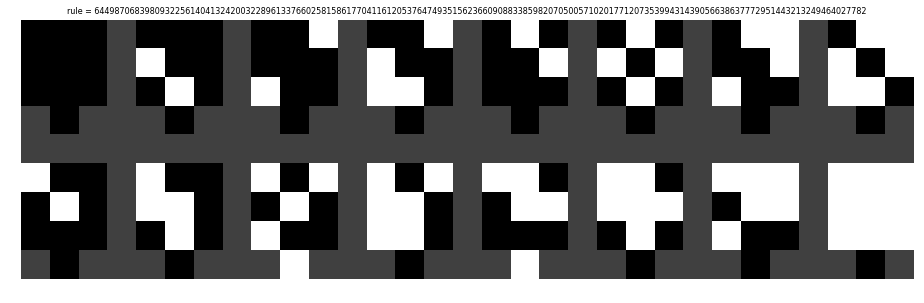

In [8]:
crt = conjRegras_tab(regra, area)
plt.imshow(crt, interpolation='none')
plt.axis('off')
titulo = 'rule = {}'.format(regra)
plt.title(titulo, fontsize=8)
plt.show()

## 6. Exemplos
---
### 6.1. autômato celular A
---

In [9]:
%%time
# Parâmetros
raio = 1
area = (2*raio + 1)**2
tamanho = 2**area
np.random.seed(sum(map(lambda c: ord(c), 'automato celular A 123')))
N = int(tamanho*0.123)
regra = np.array([1]*N + [0]*(tamanho - N))
np.random.shuffle(regra)
regra[0], regra[-1] = 0, 0
regra = int(''.join([str(e) for e in regra]), 2)

# Incialização da geração 0
celulas = (32, 128)
ger0 = np.random.random(celulas) > 0.99

fig, ax = plt.subplots(figsize=(2048//72, 512//72))

ger1 = ger0.copy()
def animation(frame):
    plt.cla()
    gen = frame
    imshow = ax.imshow(ger1, interpolation='none')
    ger1[:] = automatoCelular(ger1, regra, area)
    ax.set_title('Cellular Automaton 2D A | generation {:04}'.format(gen), fontsize=24)
    plt.tight_layout()
    return imshow

anim = manim.FuncAnimation(fig, animation, frames=64, interval=100)

anim.save('output/NLDC_cellularAutomaton2D_animA.gif', writer="imagemagick", extra_args="convert")
plt.close()

# Solve repetition problem
! magick convert _output/NLDC_cellularAutomaton2D_animA.gif -loop 0 _output/NLDC_cellularAutomaton2D_animA.gif
! echo GIF exported and reconverted. Disregard the message above.

MovieWriter imagemagick unavailable.


GIF exported and reconverted. Disregard the message above.
Wall time: 31.7 s


![cellular automaton 2D A](output/NLDC_cellularAutomaton2D_animA.gif "Cellular Automaton 2D A")

### 6.2. autômato celular B
---

In [10]:
%%time
# Parâmetros
raio = 1
area = (2*raio + 1)**2
tamanho = 2**area
np.random.seed(sum(map(lambda c: ord(c), 'automato celular B 234')))
N = int(tamanho*0.234)
regra = np.array([1]*N + [0]*(tamanho - N))
np.random.shuffle(regra)
regra[0], regra[-1] = 0, 0
regra = int(''.join([str(e) for e in regra]), 2)

# Incialização da geração 0
celulas = (32, 128)
ger0 = np.random.random(celulas) > 0.99

fig, ax = plt.subplots(figsize=(2048//72, 512//72))

ger1 = ger0.copy()
def animation(frame):
    plt.cla()
    gen = frame
    imshow = ax.imshow(ger1, interpolation='none')
    ger1[:] = automatoCelular(ger1, regra, area)
    ax.set_title('Cellular Automaton 2D B | generation {:04}'.format(gen), fontsize=24)
    plt.tight_layout()
    return imshow

anim = manim.FuncAnimation(fig, animation, frames=64, interval=100)

anim.save('output/NLDC_cellularAutomaton2D_animB.gif', writer="imagemagick", extra_args="convert")
plt.close()

# Solve repetition problem
! magick convert _output/NLDC_cellularAutomaton2D_animB.gif -loop 0 _output/NLDC_cellularAutomaton2D_animB.gif
! echo GIF exported and reconverted. Disregard the message above.

MovieWriter imagemagick unavailable.


GIF exported and reconverted. Disregard the message above.
Wall time: 31.1 s


![cellular automaton 2D B](output/NLDC_cellularAutomaton2D_animB.gif "Cellular Automaton 2D B")

### 6.3. autômato celular C
---

In [11]:
%%time
# Parâmetros
raio = 1
area = (2*raio + 1)**2
tamanho = 2**area
np.random.seed(sum(map(lambda c: ord(c), 'automato celular C 345')))
N = int(tamanho*0.345)
regra = np.array([1]*N + [0]*(tamanho - N))
np.random.shuffle(regra)
regra[0], regra[-1] = 0, 0
regra = int(''.join([str(e) for e in regra]), 2)

# Incialização da geração 0
celulas = (32, 128)
ger0 = np.random.random(celulas) > 0.99

fig, ax = plt.subplots(figsize=(2048//72, 512//72))

ger1 = ger0.copy()
def animation(frame):
    plt.cla()
    gen = frame
    imshow = ax.imshow(ger1, interpolation='none')
    ger1[:] = automatoCelular(ger1, regra, area)
    ax.set_title('Cellular Automaton 2D C | generation {:04}'.format(gen), fontsize=24)
    plt.tight_layout()
    return imshow

anim = manim.FuncAnimation(fig, animation, frames=64, interval=100)

anim.save('output/NLDC_cellularAutomaton2D_animC.gif', writer="imagemagick", extra_args="convert")
plt.close()

# Solve repetition problem
! magick convert _output/NLDC_cellularAutomaton2D_animC.gif -loop 0 _output/NLDC_cellularAutomaton2D_animC.gif
! echo GIF exported and reconverted. Disregard the message above.

MovieWriter imagemagick unavailable.


GIF exported and reconverted. Disregard the message above.
Wall time: 31.3 s


![cellular automaton 2D C](output/NLDC_cellularAutomaton2D_animC.gif "Cellular Automaton 2D C")